In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.tuning import grid_search_params as gsp

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

import os
from tqdm import tqdm

warnings.filterwarnings('ignore')

# Preparation Data

In [53]:
# df = pd.read_excel('sample_data_gc.xlsx')
# df.columns = ['date','titik_a','titik_b','titik_c','titik_d','tonase','p_ni']

df = pd.read_excel('grade_sample_data.xlsx')
df['sm_ni'] = df['sm_ni'].apply(lambda x: float(str(x).split('%')[0]))
df['sm_fe'] = df['sm_fe'].apply(lambda x: float(str(x).split('%')[0]))
df['sm_si'] = df['sm_si'].apply(lambda x: float(str(x).split('%')[0]))
df['produksi'] = df['produksi'].apply(lambda x: float(''.join(str(x).split(','))))
df.pabrik.replace('GNCS', 'GCNS', inplace=True)

# preparation data
x = df.drop(columns=['date','sm_ni','sm_fe','sm_si'])
y = df[['sm_ni']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

# Evaluation Model Machine Learning

In [54]:
models = pd.DataFrame({
    'model_name':['Random Forest','Linear','SVR','KNN'],
    'model_methods':[RandomForestRegressor(), LinearRegression(), SVR(), KNeighborsRegressor()],
    'params':[gsp.rf_params, gsp.linreg_params, gsp.svm_params, gsp.knn_params]
})

In [55]:
_ = []
for i in tqdm(range(len(models))):
    # prepare methods and params
    models_name = models.iloc[i]['model_name']
    model_methods = models.iloc[i]['model_methods']
    params = models.iloc[i]['params']
    
    # create numeric pipeline
    num_pipeline = Pipeline([
        ('scaling', MinMaxScaler())
    ])
    
    # create numeric pipeline
    cate_pipeline = Pipeline([
        ('encoder', OneHotEncoder(categories='auto', sparse=False))
    ])
    
    # create processor columns transformer
    processor = ColumnTransformer([
        ('numerical', num_pipeline, x.select_dtypes('number').columns.tolist()),
        ('categorical', cate_pipeline, x.select_dtypes('object').columns.tolist())
    ])
    
    # create proces & metods/algoritm pipeline
    pipeline = Pipeline([
        ('proces', processor),
        ('algo', model_methods)
    ])
    
    # create model using best params
    model = GridSearchCV(pipeline, params)
    model.fit(x_train, y_train)

    # peformance report
    report = pd.DataFrame({
        'Models':[models_name],
        'Best Parameter':[model.best_params_],
        'Best Score':[np.round(model.best_score_, 3)],
        'Train Score':[np.round(model.score(x_train, y_train), 3)],
        'Test Score':[np.round(model.score(x_test, y_test), 3)]
    })

    # append peformance report
    _.append(report)

100%|████████████████████████████████████████████| 4/4 [00:20<00:00,  5.23s/it]


In [56]:
report = pd.concat(_)
report

,Models,Best Parameter,Best Score,Train Score,Test Score
0,Random Forest,"{'algo__max_depth': 50, 'algo__max_features': ...",-1.271,-0.001,-0.018
0,Linear,{'algo__fit_intercept': True},-117.949,0.493,-9.439
0,SVR,"{'algo__C': 0.1, 'algo__gamma': 1000.0}",-0.961,0.264,-0.000
0,KNN,"{'algo__n_neighbors': 11, 'algo__p': 1.5, 'alg...",-1.461,-0.045,-0.024


# Apply Model Machine Learning Using Best Score : Linear Regression

In [57]:
# create numeric pipeline
num_pipeline = Pipeline([
    ('scaling', MinMaxScaler())
])

# create numeric pipeline
cate_pipeline = Pipeline([
    ('encoder', OneHotEncoder(categories='auto', sparse=False))
])

# create processor columns transformer
processor = ColumnTransformer([
    ('numerical', num_pipeline, ['titik_a', 'titik_b', 'titik_c', 'titik_d', 'tonase']),
    ('categorical', cate_pipeline, [])
])

# create proces & metods/algoritm pipeline
pipeline = Pipeline([
    ('proces', processor),
    ('algo', LinearRegression())
])

# create model using best params
model = GridSearchCV(pipeline, param_grid={'algo__fit_intercept': [False]})
model = model.fit(x_train, y_train)

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/indexes/base.py", line 3803, in get_loc
    return self._engine.get_loc(casted_key)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "pandas/_libs/index.pyx", line 138, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 165, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 5745, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 5753, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'titik_a'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/__init__.py", line 416, in _get_column_indices
    col_idx = all_columns.get_loc(col)
              ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/indexes/base.py", line 3805, in get_loc
    raise KeyError(key) from err
KeyError: 'titik_a'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py", line 378, in fit
    Xt = self._fit(X, y, **fit_params_steps)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py", line 336, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py", line 870, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/compose/_column_transformer.py", line 687, in fit_transform
    self._validate_column_callables(X)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/compose/_column_transformer.py", line 374, in _validate_column_callables
    transformer_to_input_indices[name] = _get_column_indices(X, columns)
                                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/__init__.py", line 424, in _get_column_indices
    raise ValueError("A given column is not a column of the dataframe") from e
ValueError: A given column is not a column of the dataframe


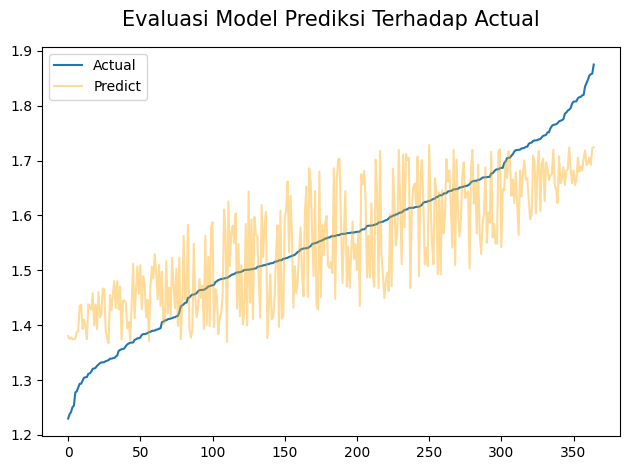

In [11]:
check = df.drop(columns='date')
check.columns = ['titik_a','titik_b','titik_c','titik_d','tonase','p_ni']
check = check.sort_values('p_ni', ascending=True)

# aplikasikan model prediksi
pred = model.predict(check.drop(columns='p_ni'))

plt.title('Evaluasi Model Prediksi Terhadap Actual', fontsize=15, pad=15)
plt.plot(check['p_ni'].tolist(), label='Actual')
plt.plot(pred, color='orange', alpha=0.4, label='Predict')
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
# buat contoh penggunaan model prediksi
titik_a = int(input('1. Jml DT Titik A :'))
titik_b = int(input('2. Jml DT Titik B :'))
titik_c = int(input('3. Jml DT Titik C :'))
titik_d = int(input('4. Jml DT Titik D :'))
tonase = (titik_a + titik_b + titik_c + titik_d) * 56

sample = pd.DataFrame({
    'titik_a':[titik_a],
    'titik_b':[titik_b],
    'titik_c':[titik_c],
    'titik_d':[titik_d],
    'tonase':[tonase]
})

predict = model.predict(sample)
print('\nPrediksi Kadar Nikel :', np.round(predict[0][0], 2))

1. Jml DT Titik A : 16
2. Jml DT Titik B : 2
3. Jml DT Titik C : 17
4. Jml DT Titik D : 6



Prediksi Kadar Nikel : 1.67


In [17]:
# 5 teratas data actual
df.head(30)

,date,titik_a,titik_b,titik_c,titik_d,tonase,p_ni
0,2023-01-01,13,3,6,11,1848,1.332262
1,2023-01-02,16,2,17,6,2296,1.617347
2,2023-01-03,1,12,7,11,1736,1.562073
3,2023-01-04,4,4,9,9,1456,1.568494
4,2023-01-05,4,13,5,16,2128,1.530937
5,2023-01-06,8,5,11,5,1624,1.650676
6,2023-01-07,10,2,11,6,1624,1.676970
7,2023-01-08,19,18,4,4,2520,1.496096
8,2023-01-09,5,1,6,8,1120,1.613703
9,2023-01-10,7,8,10,16,2296,1.669648


In [18]:
df.head(30).p_ni.mean()

1.56176707128339

In [21]:
(df.head(30).p_ni.mean() + 1.4) / 2

1.480883535641695

In [ ]:
# MPE : 2700 ton
# Produksi : 

In [24]:
((1.4/100) * 2500) * 5

174.99999999999997

In [ ]:
# buat laporan grade pembanding actual, plan MPE, plan BOD dan COA
# KBM : 2 lokasi pile

In [ ]:
# sample harian -> BDM : sample diambil masing-masing DT kemudian digabung 1 karung
# sample COA -> Team Anindya : 
# metode sampling BDM dan Team Anindya berbeda